# Visualisation des données

In [46]:
%reset -f

In [47]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [48]:
%matplotlib nbagg

In [49]:
N = len(pd.read_csv("../../data/case_1_spatial.csv"))
step_count = len(pd.read_csv("../../data/case_1_temporal.csv"))

print("Taille du maillage :", N)
print("Nombre d'iterations:", step_count)

Taille du maillage : 500
Nombre d'iterations: 756


In [50]:
# elements a visualiser
e = np.empty(shape=(step_count, N), dtype=float)
f = np.empty(shape=(step_count, N), dtype=float)
tm = np.empty(shape=(step_count, N), dtype=float)
tr = np.empty(shape=(step_count, N), dtype=float)

for i in range(step_count):
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E'])
    f[i] = np.array(df['F'])
    tm[i] = np.array(df['T'])
    tr[i] = np.array(df['Tr'])
    
x = np.array(df['x'])
rho = np.array(df['rho'])

# au temps final
display(df[:5])

,x,rho,E,F,T,Tr
0,0.001,1.0,8.35641,-0.002981,4.95208,4.96783
1,0.003,1.0,8.25090,-0.106084,4.93635,4.95207
2,0.005,1.0,8.14705,-0.208034,4.92074,4.93641
3,0.007,1.0,8.04502,-0.308662,4.90530,4.92089
4,0.009,1.0,7.94497,-0.407805,4.89003,4.90551


<IPython.core.display.Javascript object>


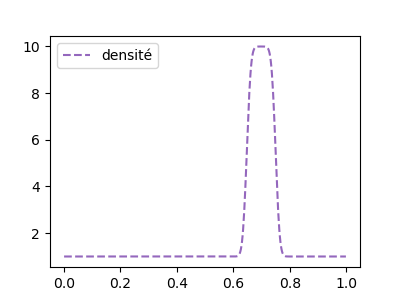

In [51]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(x, rho, '--', label="densité", color='tab:purple')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


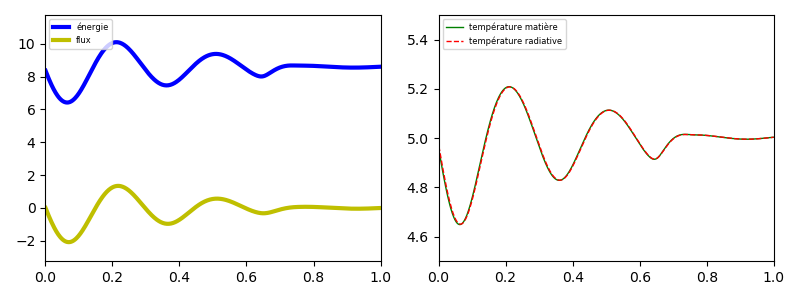

In [55]:
fig, ax = plt.subplots(1,2,figsize=(8,3))

# initialisation
im1 = [axis.plot([],[])[0] for axis in ax]
im2 = [axis.plot([],[])[0] for axis in ax]

# subplot 1 -  energy et flux
im1[0] = ax[0].plot([],[], 'b', label="énergie", lw=3)[0]
im2[0] = ax[0].plot([],[], 'y-', label="flux", lw=3)[0]

ax[0].set_xlim([0, 1])
ax[0].set_ylim([-3.25, 11.75])

# subplot 2 -  temperature matiere et radiative
im1[1] = ax[1].plot([],[], 'g-', label="température matière", lw=1)[0]
im2[1] = ax[1].plot([],[], 'r--', label="température radiative", lw=1)[0]

ax[1].set_xlim([0, 1])
ax[1].set_ylim([4.5, 5.5])

# legende sur tous les subplots
legs = [axis.legend(loc=2, prop={'size': 6})  for axis in ax]
plt.tight_layout()

def update(i):
    # subplot 1
    im1[0].set_data(x, e[i])
    im2[0].set_data(x, f[i])

    # subplot 2
    im1[1].set_data(x, tm[i])
    im2[1].set_data(x, tr[i])

    return im1 + im2

anim = FuncAnimation(fig, update, frames=step_count, interval=10, repeat=False, blit=True)
plt.show()

In [56]:
# anim.save('animation.mp4', writer='ffmpeg', fps=75)